In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [6]:

#preparation of data from gov.hk
df = pd.read_json('https://raw.githubusercontent.com/geohk/Coursera_Capstone/master/page-data.json')
new_df = df['result']['data']['allWarsCaseLocation']['edges']
df2 = json_normalize(new_df)
#drop those unrelated columns
df_after_dropping = df2.drop(df2.columns[[1,2,3,4,5,6,10,11,12,13,14,17,18]],axis=1)

#droping those have no distrist
df_after_dropping.replace('-', np.nan, inplace=True)
df_after_dropping.dropna(inplace=True)

#rename columns to a meaningful name
df_after_dropping.columns= ['types','lat','lng','location', 'date','district']


#remove spacing
df_after_dropping['lat'].replace({' ',''} ,inplace =True)
df_after_dropping['lng'].replace({' ',''},inplace =True)
df_after_dropping = df_after_dropping[df_after_dropping.lat != '']


#cast gsp as float otherwise cannot import in folium map
df_after_dropping['lat'] = df_after_dropping['lat'].astype(float)
df_after_dropping['lng'] = df_after_dropping['lng'].astype(float)


df_after_dropping





,types,lat,lng,location,date,district
0,Home Confinees,22.392700,114.193700,"Block H, Sui Wo Court",2020-02-08,Fo Tan
1,Home Confinees,22.435700,114.031000,"Block 3, Sereno Verde",2020-02-06,Yuen Long
2,Home Confinees,22.284400,114.136200,"Hai Kwang Mansion, 71-77 Hill Road",2020-02-06,Sai Ying Pun
3,Home Confinees,22.361800,114.105879,"Block 1, Villa Esplanada",2020-02-05,Tsing Yi
4,Home Confinees,22.364541,114.136272,"Block A, Kwai Chung Building",2020-02-04,Kwai Chung
5,Home Confinees,22.344902,114.201124,"Pik Fung House, Fung Tak Estate",2020-02-02,Diamond Hill
6,Home Confinees,22.383175,114.189750,"Kwong Ning Building, Shatin Centre",2020-01-31,Sha Tin
7,Work,22.287666,114.213312,"Berkshire House, Taikoo Place",2020-01-31,Quarry Bay
8,Home Confinees,22.305600,114.236900,"Ping Shing House, Ping Tin Estate",2020-01-30,Lam Tin
9,Home Confinees,22.508140,114.124668,15 Po Sheung Tsuen,2020-01-30,Sheung Shui


In [17]:
#getting GPS from hong kong
address = 'Hong Kong'
geolocator = Nominatim(user_agent="HK")
location = geolocator.geocode(address)
latitude_hk = location.latitude
longitude_hk = location.longitude
print('The geograpical coordinate of HK are {}, {}.'.format(latitude_hk, longitude_hk))

The geograpical coordinate of HK are 22.2793278, 114.1628131.


In [73]:
#port all confirumed and unconfirm 
hk_map = folium.Map(tiles='Stamen Toner',location=[latitude_hk, longitude_hk], zoom_start=14)

# add markers to map
for lat, lng, district, types in zip(df_after_dropping['lat'], df_after_dropping['lng'], df_after_dropping['district'], df_after_dropping['types']):
    label = '{}, & {}'.format(district, types)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hk_map)  
    
hk_map

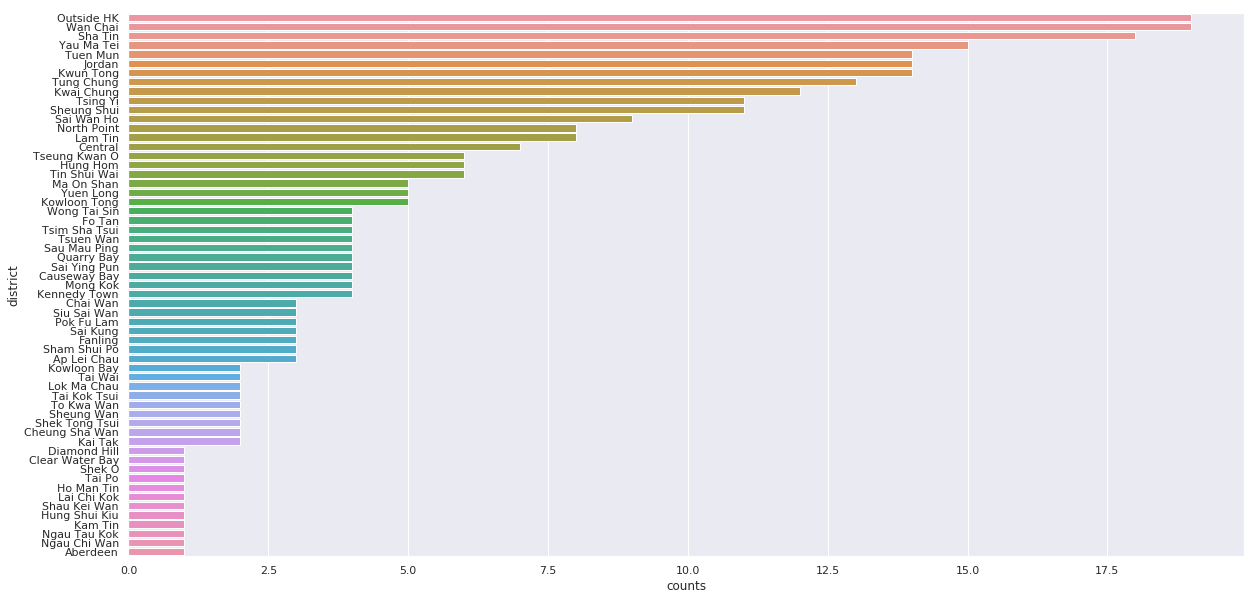

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
df_groupby_dsitrict  = df_after_dropping.groupby(['district']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
df_groupby_dsitrict
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="counts", y="district" ,data=df_groupby_dsitrict ,order=df_groupby_dsitrict['district'])

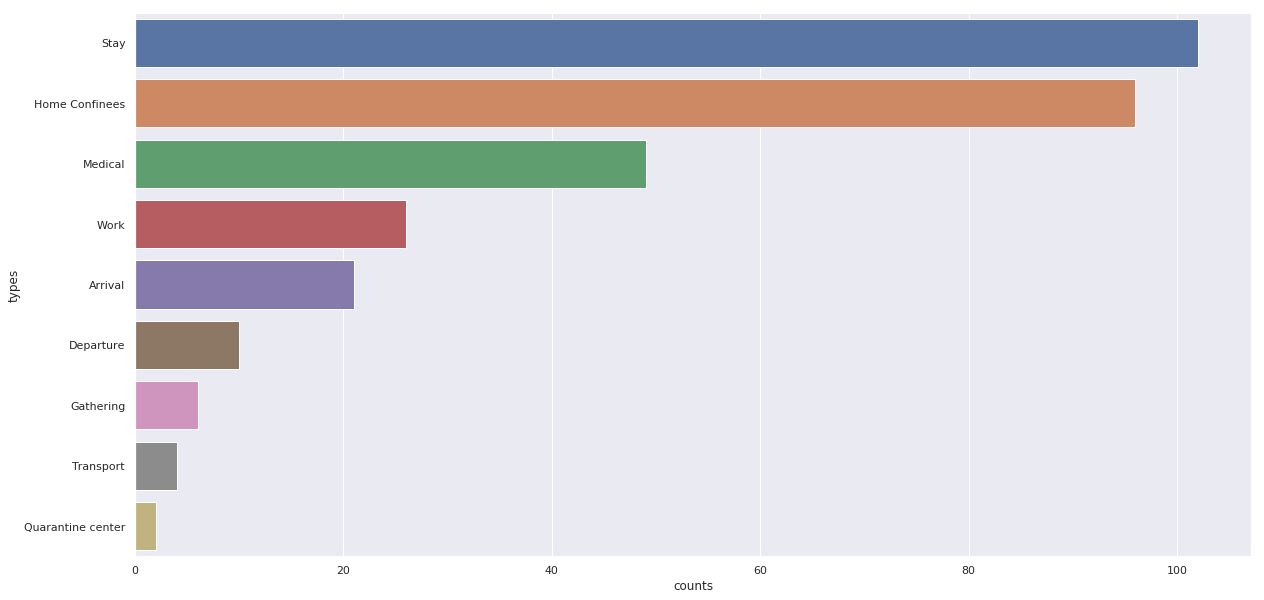

In [14]:
sns.set(rc={'figure.figsize':(20,10)})

df_groupby_type  = df_after_dropping.groupby(['types']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
df_groupby_type
ax = sns.barplot(x="counts", y="types" ,data=df_groupby_type ,order=df_groupby_type['types'])


Cluster Neighborhoods

In [31]:
# one hot encoding
df_onehot = pd.get_dummies(df_after_dropping[['types']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['district'] = df_after_dropping['district'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot
#df_onehot.shape

,district,Arrival,Departure,Gathering,Home Confinees,Medical,Quarantine center,Stay,Transport,Work
0,Fo Tan,0,0,0,1,0,0,0,0,0
1,Yuen Long,0,0,0,1,0,0,0,0,0
2,Sai Ying Pun,0,0,0,1,0,0,0,0,0
3,Tsing Yi,0,0,0,1,0,0,0,0,0
4,Kwai Chung,0,0,0,1,0,0,0,0,0
5,Diamond Hill,0,0,0,1,0,0,0,0,0
6,Sha Tin,0,0,0,1,0,0,0,0,0
7,Quarry Bay,0,0,0,0,0,0,0,0,1
8,Lam Tin,0,0,0,1,0,0,0,0,0
9,Sheung Shui,0,0,0,1,0,0,0,0,0


In [32]:
df_grouped = df_onehot.groupby('district').mean().reset_index()
df_grouped

,district,Arrival,Departure,Gathering,Home Confinees,Medical,Quarantine center,Stay,Transport,Work
0,Aberdeen,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,Ap Lei Chau,0.000000,0.000000,0.00,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000
2,Causeway Bay,0.000000,0.000000,0.00,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000
3,Central,0.000000,0.000000,0.00,0.000000,0.285714,0.000000,0.428571,0.000000,0.285714
4,Chai Wan,0.000000,0.000000,0.00,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000
5,Cheung Sha Wan,0.000000,0.000000,0.00,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
6,Clear Water Bay,0.000000,0.000000,0.00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Diamond Hill,0.000000,0.000000,0.00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Fanling,0.000000,0.000000,0.00,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000
9,Fo Tan,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.250000,0.000000,0.250000


In [46]:
from sklearn.cluster import KMeans
kclusters = 5

covid_grouped_clustering = df_grouped.drop('district', 1)
covid_grouped_clustering
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(covid_grouped_clustering)

#check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 1, 0, 2, 2, 2, 1, 1, 1, 1, 4, 1, 1, 3, 3, 1, 1, 0, 2, 2, 4, 0,
       2, 3, 4, 1, 1, 1, 2, 4, 2, 1, 2, 4, 1, 2, 2, 1, 0, 4, 1, 2, 4, 2,
       1, 1, 1, 1, 2, 2, 4, 4, 1, 2, 3, 4, 1, 2, 1], dtype=int32)

In [52]:
def return_most_type(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:

num_top = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['district']
for ind in np.arange(num_top):
    columns.append('{}{} '.format(ind+1, indicators[ind]))
   

# create a new dataframe
covid_df_sorted = pd.DataFrame(columns=columns)
covid_df_sorted['district'] = df_grouped['district']

for ind in np.arange(df_grouped.shape[0]):
    covid_df_sorted.iloc[ind, 1:] = return_most_type(df_grouped.iloc[ind, :], num_top)

covid_df_sorted

,district,1st,2nd,3rd
0,Aberdeen,Stay,Work,Transport
1,Ap Lei Chau,Home Confinees,Stay,Work
2,Causeway Bay,Work,Medical,Transport
3,Central,Stay,Work,Medical
4,Chai Wan,Stay,Medical,Home Confinees
5,Cheung Sha Wan,Medical,Home Confinees,Work
6,Clear Water Bay,Home Confinees,Work,Transport
7,Diamond Hill,Home Confinees,Work,Transport
8,Fanling,Home Confinees,Stay,Work
9,Fo Tan,Home Confinees,Work,Stay


In [67]:
# add clustering labels
#covid_df_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

covid_df_merged = df_after_dropping
covid_df_final = covid_df_merged.join(covid_df_sorted.set_index('district'), on='district')

covid_df_final

,types,lat,lng,location,date,district,Cluster Labels,1st,2nd,3rd
0,Home Confinees,22.392700,114.193700,"Block H, Sui Wo Court",2020-02-08,Fo Tan,1,Home Confinees,Work,Stay
1,Home Confinees,22.435700,114.031000,"Block 3, Sereno Verde",2020-02-06,Yuen Long,1,Home Confinees,Work,Transport
2,Home Confinees,22.284400,114.136200,"Hai Kwang Mansion, 71-77 Hill Road",2020-02-06,Sai Ying Pun,1,Home Confinees,Work,Transport
3,Home Confinees,22.361800,114.105879,"Block 1, Villa Esplanada",2020-02-05,Tsing Yi,4,Stay,Medical,Home Confinees
4,Home Confinees,22.364541,114.136272,"Block A, Kwai Chung Building",2020-02-04,Kwai Chung,2,Stay,Home Confinees,Work
5,Home Confinees,22.344902,114.201124,"Pik Fung House, Fung Tak Estate",2020-02-02,Diamond Hill,1,Home Confinees,Work,Transport
6,Home Confinees,22.383175,114.189750,"Kwong Ning Building, Shatin Centre",2020-01-31,Sha Tin,2,Medical,Home Confinees,Stay
7,Work,22.287666,114.213312,"Berkshire House, Taikoo Place",2020-01-31,Quarry Bay,1,Home Confinees,Work,Stay
8,Home Confinees,22.305600,114.236900,"Ping Shing House, Ping Tin Estate",2020-01-30,Lam Tin,2,Stay,Home Confinees,Medical
9,Home Confinees,22.508140,114.124668,15 Po Sheung Tsuen,2020-01-30,Sheung Shui,2,Home Confinees,Arrival,Medical


In [77]:
hk_map_clusters = folium.Map( tiles='Stamen Toner',location=[latitude_hk, longitude_hk], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(covid_df_final['lat'], covid_df_final['lng'], covid_df_final['district'], covid_df_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(hk_map_clusters)
       
hk_map_clusters

In [75]:
covid_df_final.loc[covid_df_final['Cluster Labels'] == 0, covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
46,22.339284,Lai Chi Kok,0,Work,Transport,Stay
47,22.319600,Kowloon Bay,0,Work,Medical,Transport
48,22.278200,Causeway Bay,0,Work,Medical,Transport
49,22.278600,Causeway Bay,0,Work,Medical,Transport
50,22.278694,Shau Kei Wan,0,Work,Transport,Stay
57,22.278447,Causeway Bay,0,Work,Medical,Transport
152,22.278447,Causeway Bay,0,Work,Medical,Transport
202,22.324182,Kowloon Bay,0,Work,Medical,Transport


In [76]:
covid_df_final.loc[covid_df_final['Cluster Labels'] == 1, covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
0,22.392700,Fo Tan,1,Home Confinees,Work,Stay
1,22.435700,Yuen Long,1,Home Confinees,Work,Transport
2,22.284400,Sai Ying Pun,1,Home Confinees,Work,Transport
5,22.344902,Diamond Hill,1,Home Confinees,Work,Transport
7,22.287666,Quarry Bay,1,Home Confinees,Work,Stay
10,22.487743,Fanling,1,Home Confinees,Stay,Work
12,22.369751,Tai Wai,1,Home Confinees,Work,Transport
13,22.332996,Sham Shui Po,1,Home Confinees,Work,Transport
14,22.454042,Tin Shui Wai,1,Home Confinees,Work,Transport
17,22.329884,Sham Shui Po,1,Home Confinees,Work,Transport


In [78]:
covid_df_final.loc[covid_df_final['Cluster Labels'] ==2 , covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
4,22.364541,Kwai Chung,2,Stay,Home Confinees,Work
6,22.383175,Sha Tin,2,Medical,Home Confinees,Stay
8,22.305600,Lam Tin,2,Stay,Home Confinees,Medical
9,22.508140,Sheung Shui,2,Home Confinees,Arrival,Medical
11,22.398043,Sha Tin,2,Medical,Home Confinees,Stay
18,22.375169,Tuen Mun,2,Stay,Home Confinees,Medical
19,22.304400,Lam Tin,2,Stay,Home Confinees,Medical
20,22.417058,Tuen Mun,2,Stay,Home Confinees,Medical
21,22.309657,Yau Ma Tei,2,Stay,Medical,Home Confinees
25,22.365242,Kwai Chung,2,Stay,Home Confinees,Work


In [80]:
covid_df_final.loc[covid_df_final['Cluster Labels'] ==3 , covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
67,22.302100,Jordan,3,Arrival,Work,Home Confinees
87,22.283100,Tung Chung,3,Departure,Arrival,Home Confinees
127,22.296000,Tung Chung,3,Departure,Arrival,Home Confinees
144,22.305000,Jordan,3,Arrival,Work,Home Confinees
166,22.314105,Tung Chung,3,Departure,Arrival,Home Confinees
184,22.310459,Tung Chung,3,Departure,Arrival,Home Confinees
186,22.310459,Tung Chung,3,Departure,Arrival,Home Confinees
213,22.304554,Jordan,3,Arrival,Work,Home Confinees
227,22.310459,Tung Chung,3,Departure,Arrival,Home Confinees
228,22.310459,Tung Chung,3,Departure,Arrival,Home Confinees


In [79]:
covid_df_final.loc[covid_df_final['Cluster Labels'] ==4 , covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
3,22.361800,Tsing Yi,4,Stay,Medical,Home Confinees
15,22.246896,Shek O,4,Stay,Work,Transport
16,22.287735,Sheung Wan,4,Work,Stay,Transport
23,22.278796,Wan Chai,4,Stay,Work,Medical
31,22.281436,Sai Wan Ho,4,Stay,Medical,Work
32,22.281436,Sai Wan Ho,4,Stay,Medical,Work
33,22.277500,Wan Chai,4,Stay,Work,Medical
34,22.350367,Tsing Yi,4,Stay,Medical,Home Confinees
38,22.252400,Aberdeen,4,Stay,Work,Transport
40,22.350367,Tsing Yi,4,Stay,Medical,Home Confinees
